In [82]:
import pandas as pd
import numpy as np
import talib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [83]:
df =pd.read_excel('quotes.XLS')

In [84]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Company,stc,NaN,NaN,NaN,NaN,NaN
1,Period,14/03/2021 – 11/03/2024,NaN,NaN,NaN,NaN,NaN
2,Ticker code,7010,NaN,NaN,NaN,NaN,NaN
3,Share,stc,NaN,NaN,NaN,NaN,
4,Currency,SAR,NaN,NaN,NaN,NaN,NaN


# Data Cleaning 

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  755 non-null    object
 1   Unnamed: 1  753 non-null    object
 2   Unnamed: 2  748 non-null    object
 3   Unnamed: 3  748 non-null    object
 4   Unnamed: 4  748 non-null    object
 5   Unnamed: 5  748 non-null    object
 6   Unnamed: 6  1 non-null      object
dtypes: object(7)
memory usage: 41.4+ KB


In [86]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 1      2
Unnamed: 2      7
Unnamed: 3      7
Unnamed: 4      7
Unnamed: 5      7
Unnamed: 6    754
dtype: int64

In [87]:
temp_df = df.iloc[5:].reset_index(drop=True)

In [88]:
df_new = pd.DataFrame(temp_df.values[1:], columns=temp_df.iloc[0])


In [89]:
df_new

,Date,Open,High,Low,Close,Volume,NaN
0,2021-03-14 00:00:00,47.2,47.52,47.04,47.28,934543,NaN
1,2021-03-15 00:00:00,47.28,47.52,46.72,47.52,1149398,NaN
2,2021-03-16 00:00:00,47.28,47.76,47.2,47.6,1012633,NaN
3,2021-03-17 00:00:00,47.52,47.52,46.24,46.4,2277733,NaN
4,2021-03-18 00:00:00,46.4,46.48,45.84,45.84,3354565,NaN
...,...,...,...,...,...,...,...
744,2024-03-07 00:00:00,41.25,41.4,41.05,41.15,1880307,NaN
745,2024-03-10 00:00:00,41.15,41.35,41.1,41.25,911055,NaN
746,2024-03-11 00:00:00,41.1,41.15,40.45,40.45,3189840,NaN
747,,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_new = df_new.iloc[:-2]

In [91]:
df_new.tail()

,Date,Open,High,Low,Close,Volume,NaN
742,2024-03-05 00:00:00,41.1,41.4,40.55,40.55,2686500,NaN
743,2024-03-06 00:00:00,40.6,41.35,40.55,41.35,2487739,NaN
744,2024-03-07 00:00:00,41.25,41.4,41.05,41.15,1880307,NaN
745,2024-03-10 00:00:00,41.15,41.35,41.1,41.25,911055,NaN
746,2024-03-11 00:00:00,41.1,41.15,40.45,40.45,3189840,NaN


In [92]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    747 non-null    object
 1   Open    747 non-null    object
 2   High    747 non-null    object
 3   Low     747 non-null    object
 4   Close   747 non-null    object
 5   Volume  747 non-null    object
 6   nan     0 non-null      object
dtypes: object(7)
memory usage: 41.0+ KB


# Data Analysis 

In [93]:
df_new.set_index('Date', inplace=True)

df_new.describe()

/Users/nawafalhussain/anaconda3/envs/udacity_env/lib/python3.9/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,Open,High,Low,Close,Volume,NaN
count,747,747.00,747,747.0,747,0
unique,320,317.00,310,320.0,747,0
top,46,46.48,40,46.4,934543,NaN
freq,10,10.00,10,13.0,1,NaN


In [94]:
df_new.head()

,Open,High,Low,Close,Volume,NaN
Date,,,,,,
2021-03-14,47.2,47.52,47.04,47.28,934543,NaN
2021-03-15,47.28,47.52,46.72,47.52,1149398,NaN
2021-03-16,47.28,47.76,47.2,47.6,1012633,NaN
2021-03-17,47.52,47.52,46.24,46.4,2277733,NaN
2021-03-18,46.4,46.48,45.84,45.84,3354565,NaN


### Q1: What is the performance for this company ? 

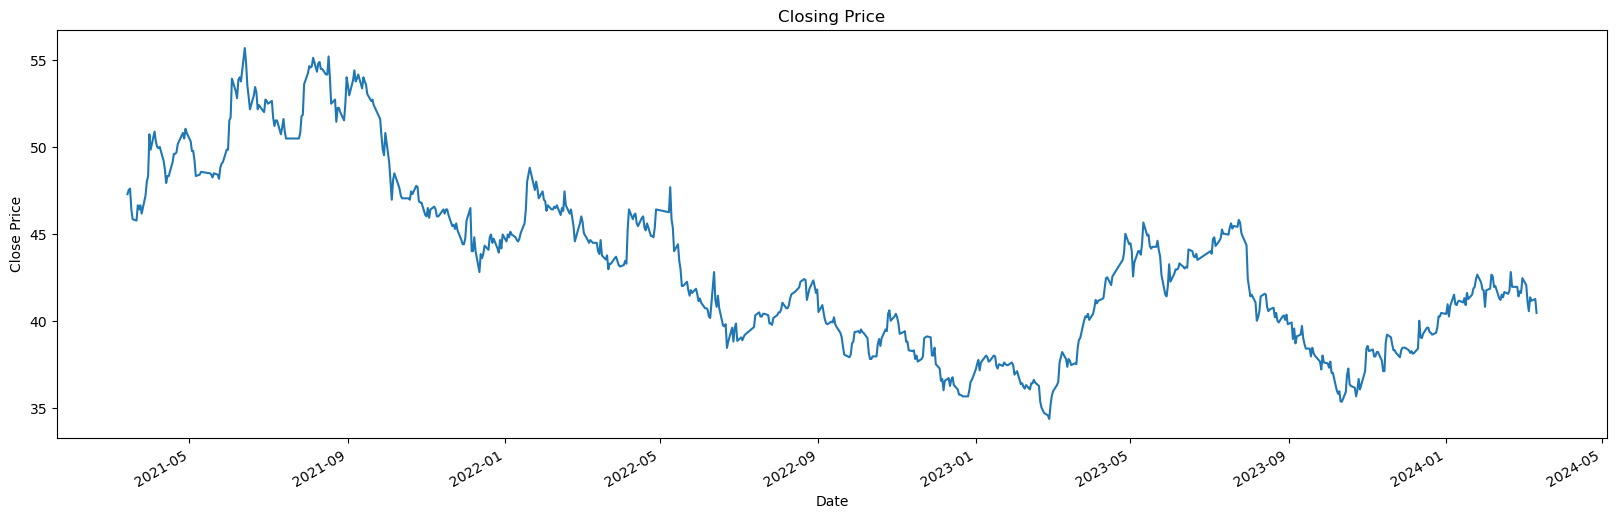

In [95]:
df_new['Close'].plot(figsize=(20, 6), title='Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()  

### Q2: How much volumn on this Company?

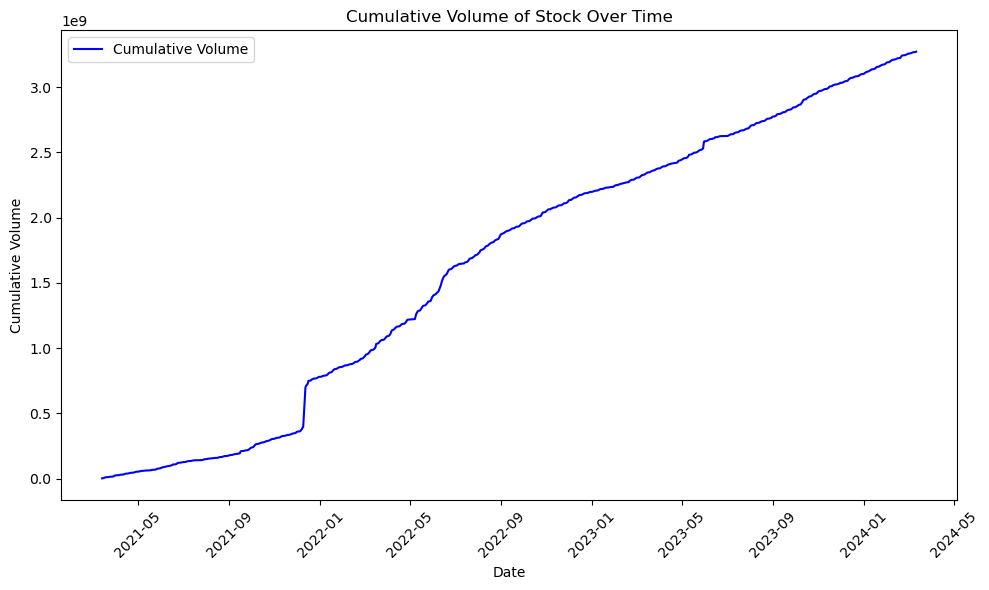

In [97]:
# Plot the cumulative sum of volume over time
plt.figure(figsize=(10, 6))
plt.plot(df_new['Volume'].cumsum(), color='b', label='Cumulative Volume')
plt.xlabel('Date')
plt.ylabel('Cumulative Volume')
plt.title('Cumulative Volume of Stock Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [103]:
df_new['Volume'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 747 entries, 2021-03-14 to 2024-03-11
Series name: Volume
Non-Null Count  Dtype 
--------------  ----- 
747 non-null    object
dtypes: object(1)
memory usage: 11.7+ KB


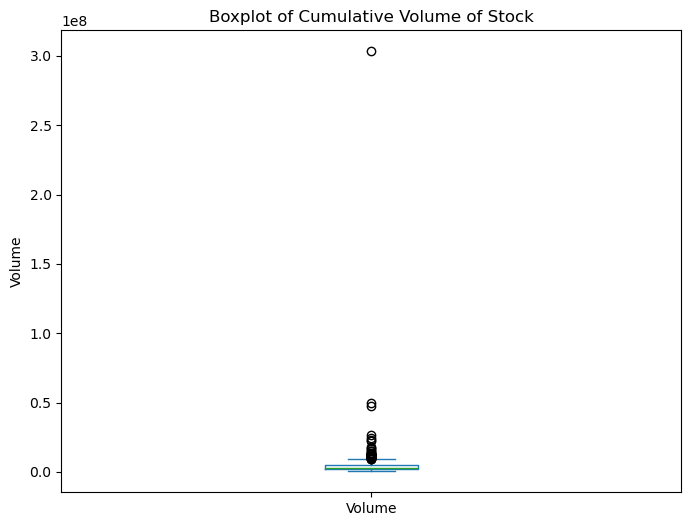

In [106]:
plt.figure(figsize=(8, 6))
df_new['Volume'].plot.box()
plt.title('Boxplot of Cumulative Volume of Stock')
plt.ylabel('Volume')
plt.show()

In [113]:
#### this date for { The secondary public offering (SPO) for STC begins today with the offering of 10.02 million shares of the company's stock to individual investors.}
max_volume = df_new['Volume'].max()

In [114]:
which_date = df_new['Volume'].idxmax()

In [115]:
# Print the details
print("The secondary public offering (SPO) for STC begins today with the offering of 10.02 million shares of the company's stock to individual investors.")
print("Maximum Volume:", max_volume)
print("Date with Maximum Volume:", which_date)

The secondary public offering (SPO) for STC begins today with the offering of 10.02 million shares of the company's stock to individual investors.
Maximum Volume: 303287005
Date with Maximum Volume: 2021-12-12 00:00:00


### Q3: How do the 20-day and 50-day moving averages provide insights into the stock's price trend?

/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_92584/2831990926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MA20'] = df_new['Close'].rolling(window=20).mean()
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_92584/2831990926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MA50'] = df_new['Close'].rolling(window=50).mean()


<Axes: title={'center': 'Moving Averages'}, xlabel='Date'>

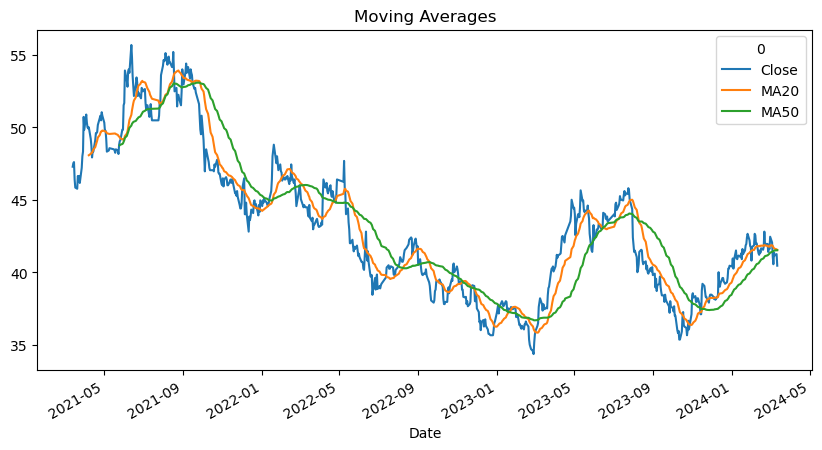

In [116]:
df_new['MA20'] = df_new['Close'].rolling(window=20).mean()
df_new['MA50'] = df_new['Close'].rolling(window=50).mean()
df_new[['Close', 'MA20', 'MA50']].plot(figsize=(10, 5), title="Moving Averages")